In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import sys
import import_ipynb
import cardChoice
import traceback
from datetime import datetime


import matplotlib.pyplot as plt
#traceback.print_stack()


Using TensorFlow backend.


importing Jupyter notebook from cardChoice.ipynb


In [2]:
def log_traceback(ex, sim):
    tb_lines = traceback.format_exception(ex.__class__, ex, ex.__traceback__)
    tb_text = ''.join(tb_lines)
    # I'll let you implement the ExceptionLogger class,
    # and the timestamping.
    print(tb_text)
    print("info: ")
    print("\t",sim.p1.turn)
    print("\t",sim.shop.cards)
    print("\t",sim.shop.checkEnd())
    print("\tp1")
    print("\t",sim.p1.hand)
    print("\t",sim.p1.deck)
    print("\t",sim.p1.discard)
    print("\tp2")
    print("\t",sim.p2.hand)
    print("\t",sim.p2.deck)
    print("\t",sim.p2.discard)



In [3]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=(18,)))
model.add(Dense(100, activation='linear'))
model.add(Dense(64, activation='linear'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [4]:
y = 0.95
eps = 0.5
decay_factor = 0.999
game_lengths = []
num_episodes = 2000
start = datetime.now()
for i in range(num_episodes):
    sim = cardChoice.Simulation()
    eps *= decay_factor
    if (i+1) % 100 == 0:
        print("Episode {} of {}".format(i + 1, num_episodes))
    done = False
    turns = 0
    while not done:
        if sim.p1.turn == sim.p2.turn:
            player = sim.p1
        else: 
            player = sim.p2
        current_state = np.array(sim.getBuyState(player))
        if np.random.random() < eps:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(model.predict(current_state))
        try:
            new_state, reward, done = sim.makeDecision(player, action)
            new_state = np.array(new_state)
        except Exception as ex:
            log_traceback(ex, sim)
            sys.exit()
        target = reward + y * np.max(model.predict(new_state))
        target_vec = model.predict(current_state)[0]
        target_vec[action] = target
        model.fit(current_state, target_vec.reshape(-1, 4), epochs=1, verbose=0)
    game_lengths.append(sim.p1.turn)

finish = datetime.now()
print("Time =", str(finish-start))

x=range(1,1+num_episodes)
y=game_lengths



Episode 100 of 2000
Episode 200 of 2000
Episode 300 of 2000
Episode 400 of 2000
Episode 500 of 2000
Episode 600 of 2000
Episode 700 of 2000
Episode 800 of 2000
Episode 900 of 2000
Episode 1000 of 2000
Episode 1100 of 2000
Episode 1200 of 2000
Episode 1300 of 2000
Episode 1400 of 2000
Episode 1500 of 2000
Episode 1600 of 2000
Episode 1700 of 2000
Episode 1800 of 2000
Episode 1900 of 2000
Episode 2000 of 2000
Time = 0:12:56.989450


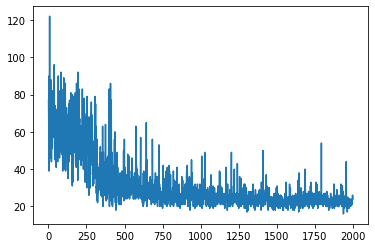

In [5]:
# Area plot
x=range(1,1+num_episodes)
y=game_lengths
plt.plot(x, y)


In [6]:
import statistics as math
def subgraph(interval, num_episodes, y):
    avgs = []
    for i in range(int(num_episodes/interval)):
        avgs.append(math.mean(y[i*interval:(i+1)*interval]))
    plt.plot(range(1,1+len(avgs)), avgs)

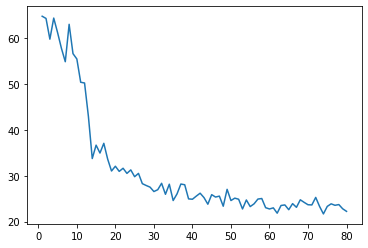

In [7]:
subgraph(25, num_episodes, game_lengths)

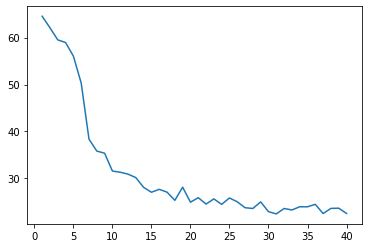

In [8]:
subgraph(50, num_episodes, game_lengths)

In [9]:
model.save("dense_2000")

In [11]:
from tensorflow import keras
loadedModel = keras.models.load_model('complex_1000')

In [12]:
print(loadedModel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 6,144
Trainable params: 6,144
Non-trainable params: 0
_________________________________________________________________
None
